# Traffic sing classifier

## Load data

In [9]:
import os
import skimage.data
from skimage import io

CLASSES = 62
ROOT_PATH = "../data/belgium_ts"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

def label_array(label):
    d = [0] * CLASSES
    d[label] = 1
    return d

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(label_array(int(d)))
    return images, labels


images, labels = load_data(train_data_directory)
images[0].shape

(203, 190, 3)

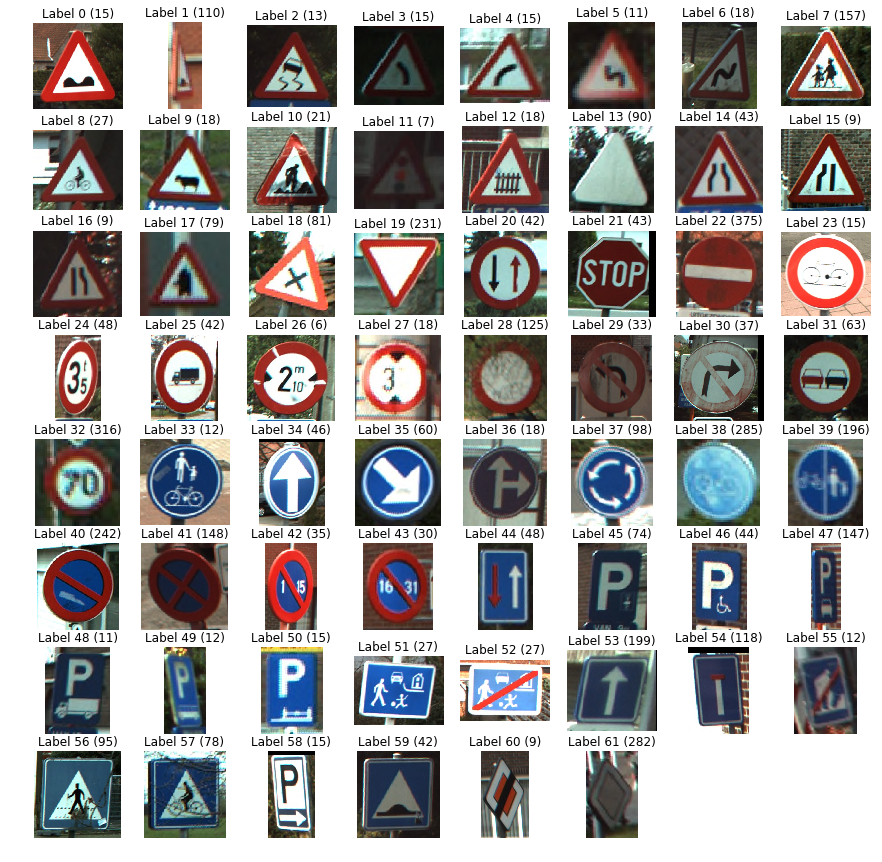

In [5]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 
# Get the unique labels 

target = [l.index(1) for l in labels]
unique_labels = set(target)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[target.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, target.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

## Data normalization

In [18]:
from skimage import transform
from skimage import color
import numpy as np


def resize(images, w=28, h=28):
    # Rescale the images in the `images` array
    return [transform.resize(image, (w, h)) for image in images]

def rgb2gray(images):
    # Convert `images` to grayscale
    return color.rgb2gray(np.array(images))

images28 = resize(images)

images28[0].shape

/home/mmoran/.miniconda3/envs/tf/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(28, 28, 3)

In [12]:
images28 = rgb2gray(images28)

images28[0].shape

(28, 28)

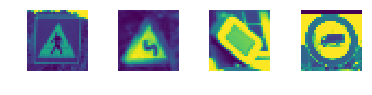

In [15]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
import tensorflow as tf 

graph = tf.Graph()